In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [12]:
def visualize_data(x,y, title='Random Plot', target=[0], label =['Feature 1', 'Feature 2']):
    colormap = np.array(['r', 'g', 'b'])
    plt.scatter(x,y, c= colormap[target])
    plt.title(title)
    plt.xlabel(label[0])
    plt.ylabel(label[1])
    plt.axhline(0, color='b')
    # Add a legend with roll numbers
    plt.legend([f'Roll [5,9]'])
    plt.show()

def calculate_cov_eig(new_x):
    cov_mat = np.cov(new_x.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    print(f'Covariance Matrix: {cov_mat}\n Eigen Values: {eigenvalues}\n Eigen Vectors: {eigenvectors}')
    return cov_mat,  eigenvalues, eigenvectors

def apply_pca(eigen_row, x):
    pca_data = np.matmul(eigen_row, x.T)
    pca_data= pca_data.T
    return pca_data

In [5]:
x1 = np.random.randn(20)
x2 = np.random.randn(20)

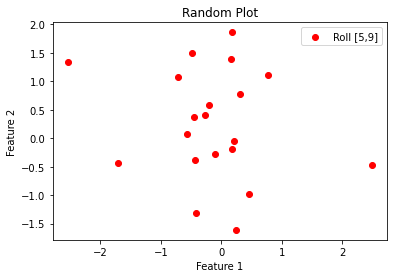

In [6]:
visualize_data(x1,x2)

In [7]:
d = np.random.rand(2,2)
x = [x1,x2]
x = np.array(x).T
print(x)

[[ 0.1549701   1.39752282]
 [-0.57562568  0.0809797 ]
 [-0.42957425 -0.38470158]
 [ 0.20678114 -0.04750947]
 [ 2.49630199 -0.47106547]
 [-1.71009619 -0.44192166]
 [ 0.30421477  0.77692829]
 [-0.42507178 -1.31945956]
 [-0.7201777   1.07806861]
 [ 0.76586562  1.10494888]
 [-0.10728768 -0.28014656]
 [ 0.17637749  1.86053799]
 [ 0.23653676 -1.61020055]
 [-0.45034439  0.37291389]
 [-0.26368121  0.40089448]
 [-2.5406778   1.33493487]
 [-0.19676977  0.5916391 ]
 [ 0.1687912  -0.19296073]
 [-0.49095526  1.49343445]
 [ 0.4577995  -0.9780883 ]]


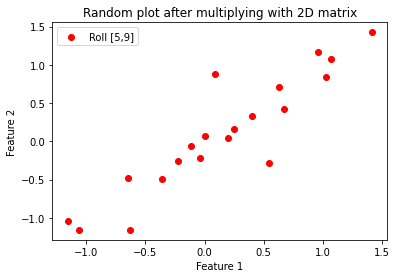

In [8]:
new_x = np.matmul(x, d)
visualize_data(new_x[:,0], new_x[:,1], 'Random plot after multiplying with 2D matrix')

In [9]:
cov, eigenvalues, eigenvectors,  = calculate_cov_eig(new_x)

Covariance Matrix: [[0.50259937 0.49544991]
 [0.49544991 0.58406241]]
 Eigen Values: [0.0462095  1.04045227]
 Eigen Vectors: [[-0.73550485 -0.67751946]
 [ 0.67751946 -0.73550485]]


In [11]:
data = apply_pca(eigenvectors[:,1] , new_x)

array(1.04045227)

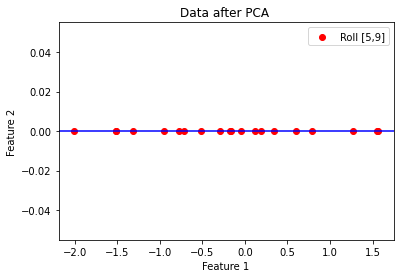

In [13]:
visualize_data(data, np.zeros_like(data), 'Data after PCA ')

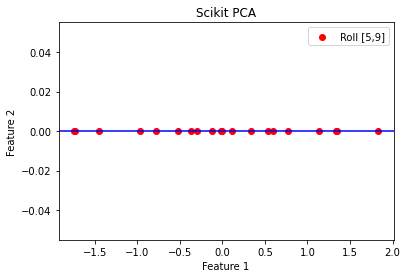

In [14]:
#use of skleannr 
from sklearn.decomposition import PCA

# Assume you have a dataset called `data` with dimensions (m, n)

# Create an instance of PCA with the desired number of components
n_components = 1  # Specify the number of principal components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(new_x)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(new_x)

# Access the explained variance ratio
visualize_data(transformed_data, np.zeros_like(transformed_data), 'Scikit PCA')